## SyriaTel Customer Churn Project

Please fill out:
* Student name: Dennis mwania
* Student pace:  Remote
* Scheduled project review :Feb 17 at 12am - Feb 23 at 11:59pm
* Instructor name: faith rotich
* Blog post URL:


## INTRODUCTION
In this project, we focus on the analysis of customer churn data from SyriaTel, a leading telecommunications provider. Customer churn refers to the phenomenon of customers discontinuing their services, and understanding the factors behind churn is critical for telecom companies like SyriaTel. By predicting churn, companies can take proactive measures to retain customers, improve customer satisfaction, and optimize resources.

The SyriaTel Customer Churn dataset contains information about the usage, demographic, and service-related details of customers. The main objective of this project is to identify the key factors influencing customer churn and to build a predictive model to forecast the likelihood of customer attrition.
## Problem Statement:
SyriaTel, a prominent telecommunications company, seeks to minimize customer churn—the rate at which customers stop doing business with them. High churn rates can be costly, as acquiring new customers is more expensive than retaining existing ones. This project aims to develop a predictive model to identify customers who are at high risk of discontinuing their services (churning) in the near future. By predicting churn, SyriaTel can implement proactive strategies to retain these customers and reduce revenue loss.

# Business Understanding
## Main Objective:
The primary goal of this project is to predict customer churn for SyriaTel, a telecommunications company. Customer churn refers to the phenomenon where customers stop using a company's services. Predicting churn is crucial for SyriaTel to implement retention strategies, improve customer satisfaction, and ultimately increase revenue.
## Specific objectives:
1. To do exploratory data analysis on the data 
2. To Identify the key factors or variables that contribute most to customer churn.
3. To fit different classification algorithm models 
4. To determine which one works best for churn prediction
5. To Evaluate the effectiveness of churn prediction models using metrics like accuracy, precision, recall, and F1 score.


## Data Source:
The dataset used for this analysis is the SyriaTel Customer Churn dataset, which contains information about customers and whether they have churned. https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

## Importing Libraries:
Before loading the dataset, it's essential to import the required libraries. These libraries provide functionality for handling data, performing analysis, and visualizing the results.

In [77]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data import and Overview

The "Data Import and Overview"  involves loading the dataset into your working environment and performing basic exploratory tasks to understand the dataset's structure, the types of variables present.

In [78]:
#importing churn_in_telecomms dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')


In [79]:
#reviewing the first ten columns
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [80]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [81]:
#summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning
In this section, we will be looking at the missing values in the dataset
as well as the duplicate records.

In [82]:
# Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [83]:
#checking for duplicates
df.duplicated().sum()

0

In [84]:
print('This data has no duplicates and missing values')

This data has no duplicates and missing values


## Inspecting the Target Variable:
In a binary classification problem like customer churn prediction, we will look at the distribution of the target variable (e.g., Churn column) to understand how balanced the classes are. This can help you assess whether any class balancing techniques might be necessary.

In [85]:
# Check the distribution of the target variable (Churn)
# Check the distribution of the target variable 
# Replace 'Churn' with the actual column name in your dataset
df['churn'].value_counts()


False    2850
True      483
Name: churn, dtype: int64

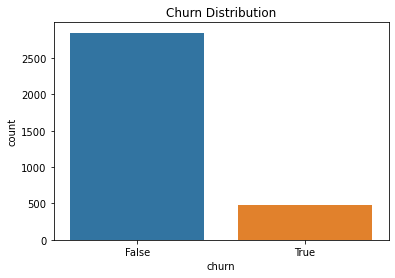

In [86]:
# Visualize the distribution of churn (target variable)
sns.countplot(x='churn', data=df) # Changed 'Churn' to 'churn'
plt.title('Churn Distribution')
plt.show()

The dataset is imbalanced, with more customers not churning than churning.

Text(0.5, 1.0, 'churn Rate')

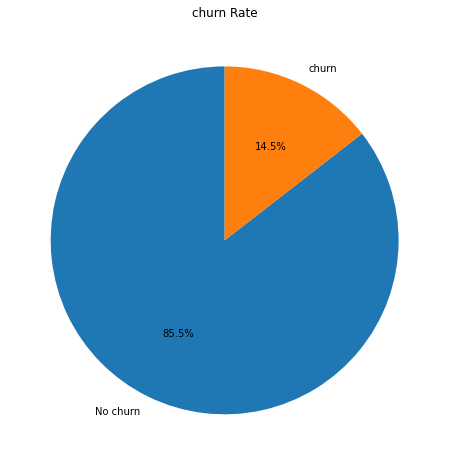

In [87]:
#Create a pie chart using pyplot to visulaize churn rate
plt.figure(figsize=(8, 8))
plt.pie(df['churn'].value_counts(), labels=['No churn', 'churn'], autopct='%1.1f%%', startangle=90)
plt.title('churn Rate')

The chart clearly shows that the majority of customers (85.5%) have not churned, while a smaller portion (14.5%) has churned. This suggests a relatively low churn rate, which is generally positive for a business.

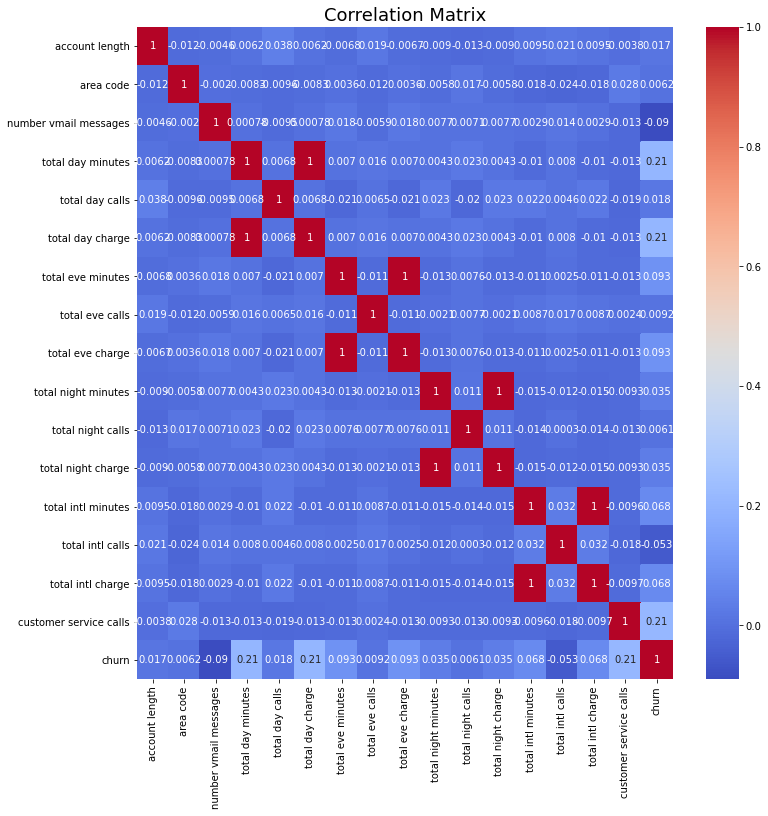

In [88]:
#correllation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,12))   # Set the figure size to 12 inches by 12 inches
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show();

## Observation:
Data: The matrix examines correlations between variables like account length, call usage (day, evening, night, international), customer service calls, and churn (whether a customer left).
 * Strong Correlations: Expectedly, there are strong positive correlations between call minutes and corresponding charges (day minutes vs. day charge, etc.).
 * Churn Indicators: The matrix suggests a moderate positive correlation between customer service calls and churn, indicating that customers who call customer service more often are more likely to churn. There's also a weak negative correlation between account length and churn, meaning longer-term customers are slightly less likely to leave

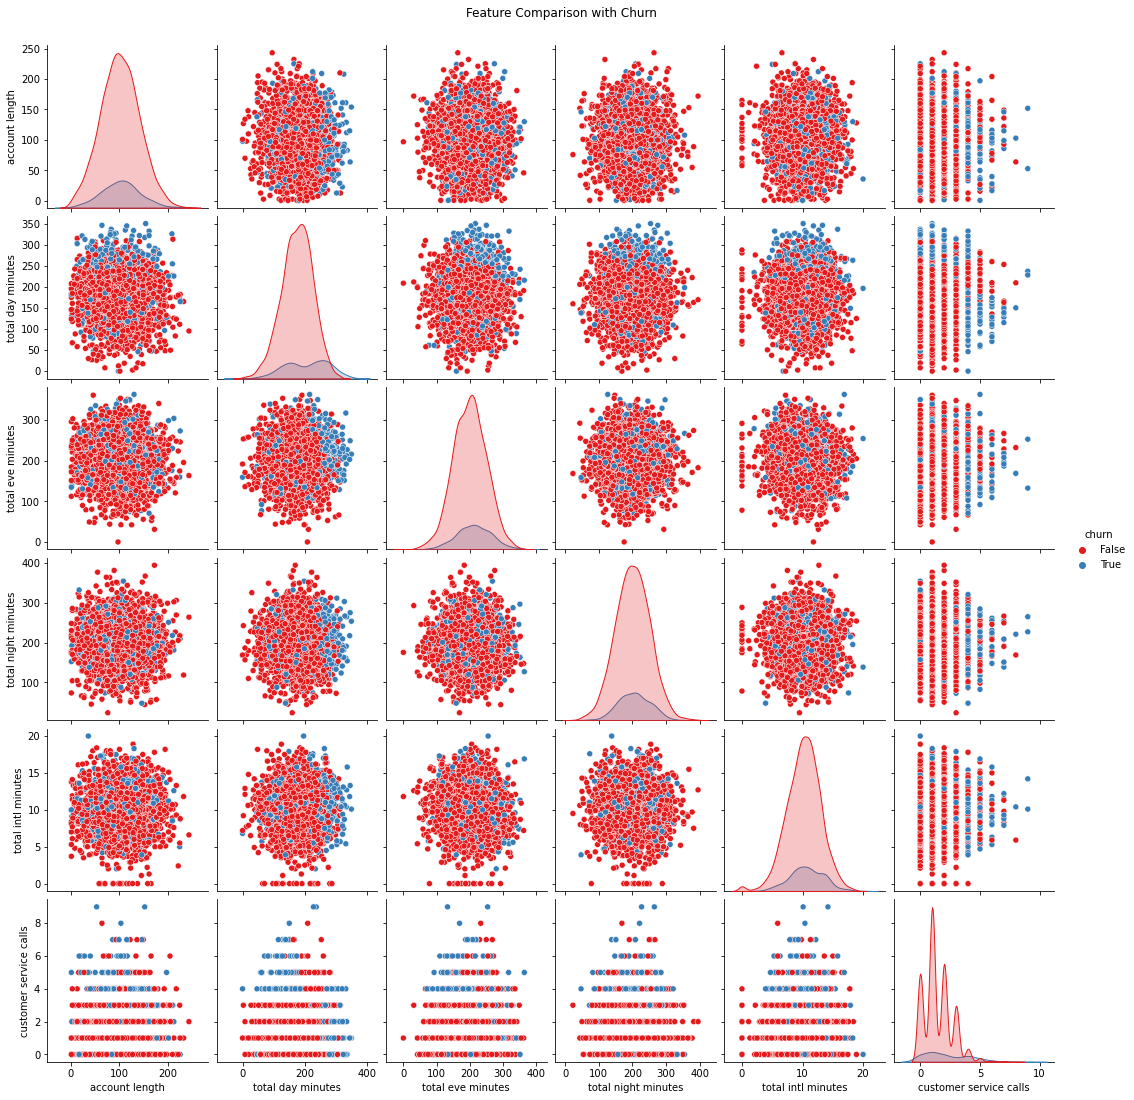

In [89]:
# Select relevant features for pairplot
features = ['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'customer service calls', 'churn']
sns.pairplot(df[features], hue='churn', palette='Set1')
plt.suptitle('Feature Comparison with Churn', y=1.02)
plt.show()


In [90]:
#Checking the distribution of categorical features
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, data=df,color='pink', order=df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

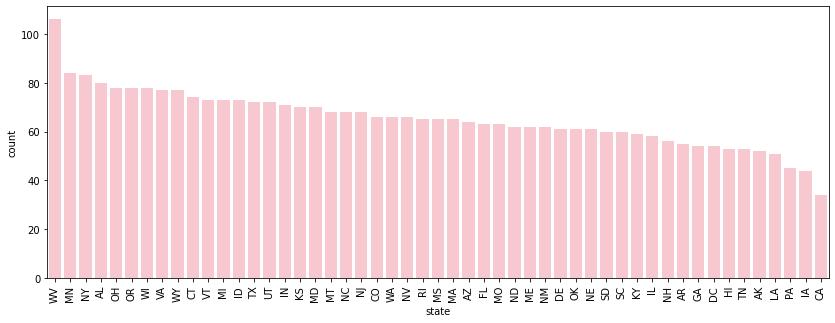

In [91]:
#state
plot_categorical_distribution(df, 'state')

Most customers are from West Virginia,Minnesota,NewYork,Alabama and alabama

## international plan

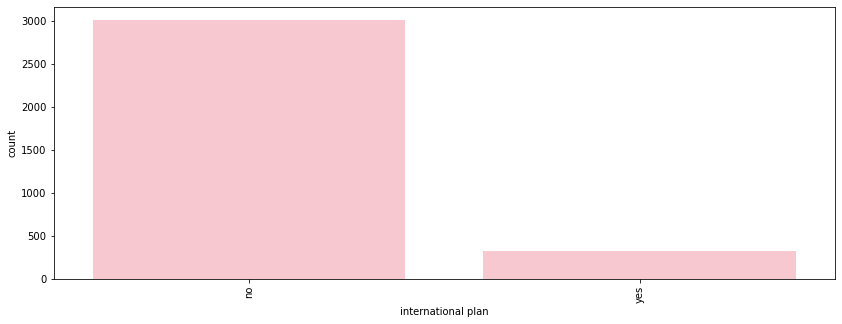

In [92]:
plot_categorical_distribution(df,'international plan')

In [93]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

## voice mail plan

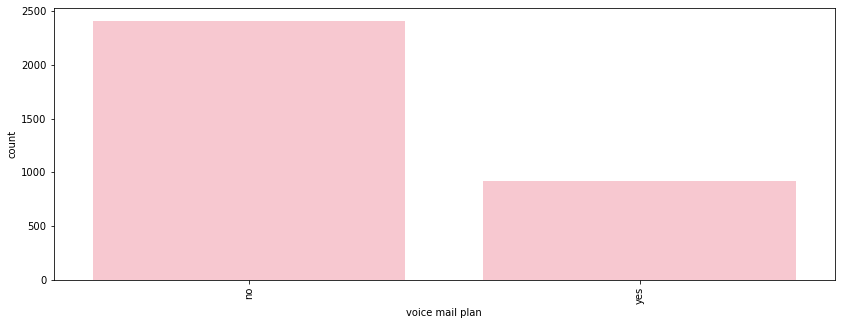

In [94]:
plot_categorical_distribution(df, 'voice mail plan')

In [95]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [96]:
#Checking the distribution of categorical features based on churn rate
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(10, 4))
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x=feature, hue="churn", data=df, order=top_10_categories)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

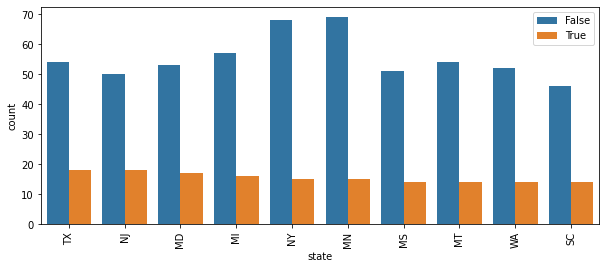

In [97]:

plot_categorical_distribution(df, 'state')

Texas, New Jersey, Maryland,Miami and NewYork has the highest churn rate among the top 10 states, as indicated by the highest orange bar

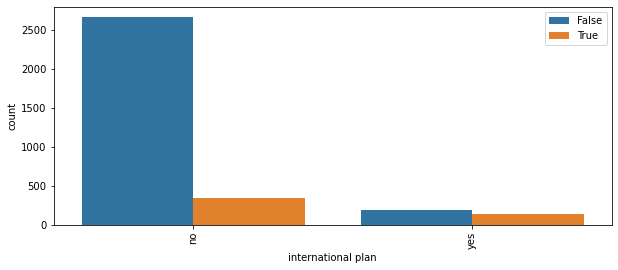

In [98]:
#International plan
plot_categorical_distribution(df, 'international plan')

Dominance of "no": The chart clearly shows that the majority of customers in the dataset do not have an international plan ("no" bar is significantly taller than the "yes" bar).

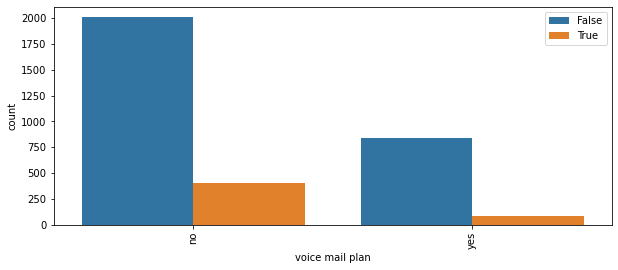

In [99]:
#voice mail plan
plot_categorical_distribution(df, 'voice mail plan')

most customers who churned did not have an voicemail plan.

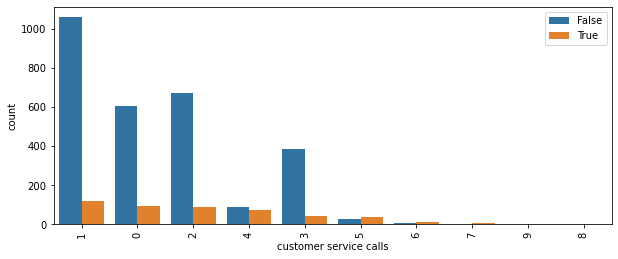

In [100]:
#customer service calls
plot_categorical_distribution(df, 'customer service calls')

the chart suggests that the number of customer service calls is a potential predictor of customer churn. Customers who make more service calls are more likely to churn, while those who make fewer calls are more likely to remain customers. Additionally, the absence of a voicemail plan is observed to be associated with churn

## Feature Engineering
In this phase, we'll perform Label Encoding, One Hot Encoding and Scaling the data.

1. Label Encoding
-It is a technique used to convert categorical variables into numerical values. 



In [101]:
# Convert columns with 'yes' or 'no' to binary using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

2. One Hot Encoding
-This is a technique used to convert categorical variables into a set of binary features

In [102]:
df = pd.get_dummies(df,columns = ['state', 'area code','international plan','voice mail plan'])
df.head()

,account length,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,1,0,1,0,0,1
1,107,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,1,0,1,0,0,1
2,137,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,1,0,1,0,1,0
3,84,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,1,0,0,0,1,1,0
4,75,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,1,0,0,1,1,0


## Scaling the data

Data scaling refers to the process of transforming the features (or variables) in a dataset to a common scale, without distorting differences in the ranges of values. This process is important when working with machine learning algorithms 

In [103]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

,account length,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.524793,382-4657,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,371-7191,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,358-1921,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.342975,375-9999,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.305785,330-6626,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## MODELING


Modeling data involves applying machine learning algorithms or statistical methods to make predictions or uncover patterns within the data. It’s one of the key steps in data science and analytics. we will build a model that can predict the customer churn based on the features in our dataset.

we will be using the following algorithms:

-Logistic Regression
-Decision Tree
-Random Forest

In [104]:
#convert categorical variables to dumy/indicator variables
df=pd.get_dummies(df, drop_first=True)

In [105]:
#Defining X and y
X = df.drop("churn", axis=1)
y = df["churn"]

In [106]:
#Train-Test Split
#Splitting data into train and test sets using a test_size of 0.25

#splitting the data in to train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## Logistic Regression
Logistic Regression is a popular machine learning algorithm used for binary classification tasks, where the goal is to predict one of two possible outcomes (e.g., yes/no, true/false, 1/0).

In [107]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
# Train logistic regression model with class_weight='balanced'
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [109]:
# Predictions
y_pred = model.predict(X_test)


In [110]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [111]:
# Display results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8201
Confusion Matrix:
 [[610  99]
 [ 51  74]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       709
         1.0       0.43      0.59      0.50       125

    accuracy                           0.82       834
   macro avg       0.68      0.73      0.69       834
weighted avg       0.85      0.82      0.83       834



## interpretaction
Accuracy: 0.8201 (82.01%) - This means that about 82% of the predictions made by the model are correct.
The model performs well in predicting non-churn instances (Class 0.0) with high precision and recall.

However, it struggles with predicting churn instances (Class 1.0), as evidenced by the lower precision and recall. This means the model is more likely to miss churners and has a higher rate of false positives.

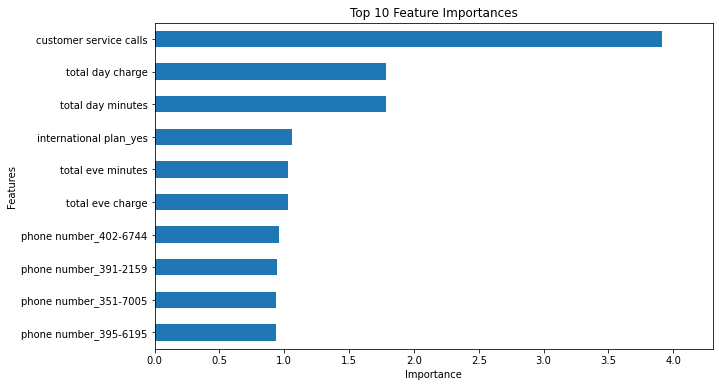

In [112]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Fit your logistic regression model first
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Access coefficients for the feature importances
importance = logreg.coef_[0]
feature_names = X_train.columns
feature_importances = pd.Series(importance, index=feature_names)

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features) * 1.1)  # Set the xlim to the maximum importance value
plt.show()


According to the model,total day charge, customer service calls,total day minutes are the top three most important features.

## Decision Tree model

In [113]:
# Train Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [114]:
# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9209
Confusion Matrix:
 [[674  35]
 [ 31  94]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       709
         1.0       0.73      0.75      0.74       125

    accuracy                           0.92       834
   macro avg       0.84      0.85      0.85       834
weighted avg       0.92      0.92      0.92       834



Accuracy: 0.9209 (92.09%) - This means that about 92% of the predictions made by the model are correct.
The model performs exceptionally well in predicting non-churn instances (Class 0.0) with high precision and recall.

It also shows significant improvement in predicting churn instances (Class 1.0) with better precision and recall compared to the previous model

## Random Forest model

In [115]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)


In [116]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8861
Confusion Matrix:
 [[709   0]
 [ 95  30]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       709
         1.0       1.00      0.24      0.39       125

    accuracy                           0.89       834
   macro avg       0.94      0.62      0.66       834
weighted avg       0.90      0.89      0.85       834



Accuracy: 0.8861 (88.61%) - This means that about 89% of the predictions made by the model are correct.
The model performs exceptionally well in predicting non-churn instances (Class 0.0) with high recall and a good balance between precision and recall.

However, it struggles significantly in predicting churn instances (Class 1.0), with a high precision but very low recall. This means the model correctly identifies churners when it predicts them, but misses a lot of actual churners.

 ## Model Evaluation
 Model evaluation refers to the process of assessing how well a machine learning model performs on a given task. This involves measuring the model's ability to make accurate predictions and generalize to new, unseen data
 

## Models Comparison - ROC Curve

In [ ]:
# Compute ROC Curves
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train models (ensure you have your X_train, y_train)
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
log_probs = logreg.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC Curves
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Compute AUC Scores
log_auc = auc(log_fpr, log_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, linestyle='--', label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, linestyle='--', label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, linestyle='--', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()



AUC (Area Under the Curve) Scores:

Logistic Regression (AUC = 0.83): Performs well but is outperformed by tree-based models.
Decision Tree (AUC = 0.86): Better than logistic regression but still not the best.
Random Forest (AUC = 0.93): The best-performing model, with the highest AUC, meaning it has the strongest ability to differentiate between classes.
Model Performance:

The Random Forest model (green curve) is closest to the top-left corner, meaning it has the highest True Positive Rate (TPR) while keeping a low False Positive Rate (FPR).
The Decision Tree model (orange curve) performs better than Logistic Regression but is still lower than Random Forest.
Logistic Regression (blue curve), while decent, has a more gradual rise, meaning it struggles more with classification.
Best Model: Since higher AUC values indicate better performance, the Random Forest model (AUC = 0.93) is the best model for this dataset.

##  RECOMMENDATIONS

-Most customers do not have an international plan or voicemail plan.  The business should think about promoting these services to customers who might benefit from them but do not currently have them.
-increase marketing in states with higher churn rates, such as Texas, New Jersey, Maryland, Miami, and New York. 
-Total day minutes, total eve charge, total night minutes, and total international calls and charges were identified as influential predictors the company can 